## Computing Franck Condon Spectra for CO Molecule
## Written by: Khanna Ajay || Date Completed: Feb.10.2020 || Lab: Dr. C.M. Isborn

### Updated on Nov.30.2022
### Added list Comprehension
### Cleaned it up a little bit

In [64]:
#importing libraries
import numpy as np
from numpy.polynomial.hermite import hermval
from numpy import math
import pandas as pd
from pandas import DataFrame as df

# Increases the Width of Current Jupyter Notebook
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
#pd.set_option('display.max_colwidth', -1)  # or 199

# Import Matplot Library
import matplotlib.pyplot as plt
import matplotlib as matplot
from matplotlib.pyplot import figure
   
import chart_studio.plotly as plotly
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF
from plotly.subplots import make_subplots
import plotly
#plotly.tools.set_credentials_file(username='Samdig', api_key='0k2OH9PK2zjVYpASiiFY')

# Offline Mode
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Interaction Mode

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Equation Involved
$$\Psi_\nu(x) = N_\nu H_\nu(\alpha x) e^{(-\frac{\alpha^2 x^2}{2})} $$

$$\alpha = (\frac{\mu k_f}{\hbar^2})^\frac{1}{4} $$
$$Also: \alpha = (\mu^2\sqrt{\omega})^\frac{1}{4} $$
$$\omega = \sqrt{\frac{k_f}{\mu}}$$

$$N_\nu = (\frac{\alpha}{2.^\nu \nu!\pi^\frac{1}{2}})^\frac{1}{2}$$

$$\nu = 0, 1, 2, 3, .... \infty $$

$$H_\nu(αx) = (-1)^{\nu} \exp(\alpha^2x^2) \frac{d^\nu}{d \mathbf{x^\nu}} exp(-\alpha^2x^2) $$

In [65]:
def vibrational_energy(v,h_bar,ω):
    E_v = (v + (1./2.)) * h_bar * ω     # Units --> Hartree
    return E_v

def normalization(v,α):
    N_v = math.sqrt(α/(2.**v * math.factorial(v) * math.sqrt(math.pi)))
    return N_v


In [66]:
# System = Carbon monoxide (CO)
# Predefined Variables, All Units are in Atomic Units

h_bar = 1.
v = np.arange(0,50)     # Range of Vibrational Quantum Number

atom_1_mass = 12.000000000  # Mass of Atom-1
atom_2_mass = 15.994914640  # Mass of Atom-2
m_reduced = (atom_1_mass*atom_2_mass/(atom_1_mass + atom_2_mass))   # Reduced Mass
 

# System's Parameter
force_constant_CO = 1857    # Units: N/meter

k_gs = (force_constant_CO * 2.293710449e+17 )/((1.889725989e+10)**2)    # Force Constant of System in Ground State, Units: Hartree/Bohr^2
k_ex = k_gs - ((5./100) * k_gs) # Force Constant of System in Excite State

α_gs = np.power((k_gs*m_reduced)/h_bar, (1./2.))    # Unitless Parameter
α_ex = np.power((k_ex*m_reduced)/(h_bar**2), (1./2.))

ω_gs = np.sqrt(k_gs/m_reduced)  # Angular Frequencies of States
ω_ex = np.sqrt(k_ex/m_reduced)

# Electronic Energy for Ground and Excited State 
E_gs = -113.317323  # Grounds State Energy - Calculated Using DFT/B3LYP 6-31+g(d,p), This is With Zero Point Correction (Units: Hartree)
E_ex = -113.025632  # Excited State Energy - Calculated Using TDDFT/B3LYP 6-31+g(d,p), root=1, This is With Zero Point Correction (Units: Hartree)
# Difference in E = -113.025632 + 113.317323 = 0.291691 Hartree --> eV = 27.2114 * 0.291691 = 7.93732
# Differnce in R = R_ex - R_gs = 1.24202 - 1.13722 = 0.1048 Angs = 0.19804 Bohr
#E_ex = -113.296930                                                 

#T = 298.15 # Temperature (in Kelvin)
k_b = 1.380649 * (10**(-23))    # In JK^-1

# Conversion Factors
joule_2_hatree = 2.293710449e+17
#print(ω_gs, ω_ex)
#ω_ex = 100.

In [67]:
# Vibrartional Energies of Ground & Excited State
E_v_gs = vibrational_energy(v,h_bar,ω_gs)
E_v_ex = vibrational_energy(v,h_bar,ω_ex)

# Total Energy of Ground and Excited State
E_gs_total = E_v_gs + E_gs
E_ex_total = E_v_ex + E_ex

#pd.DataFrame([E_gs_total, E_ex_total]).T

In [68]:
N_v_gs = [normalization(v[i], α_gs) for i in v ] 
N_v_ex = [normalization(v[i], α_ex) for i in v ] 

In [69]:
# Calculating 'Physicsts' Hermite Polynomial
d = 0.
x = np.arange(-40.,40.,.01)
Hermite_gs = []     # Hermite Polynomical Array
coef = np.zeros(v.shape)    # Coeffcients of Hermite Polynomial
coef[0] = 1.    # Changing First Element of Coffecient to 1

# For Loop to Calculate Hermite Polynomials for Every Vibrational Quantum Number
for i in range(49):
    Hermite_gs.append(hermval(x=α_gs*(d-x),c=coef)) # Filling Hermite Array with Hermite Polynomical at x=(α*(x-d))
    coef[i] = 0     # Replacing Coeffcient 'ith' place with zero
    coef[i+1] = 1   # Replace Coeffcient 'i+1th' place with 1
Hermite_gs.append(hermval(x=α_gs*(d-x),c=coef))     # Calling Hermite for the 50th vibrational number

gauss_func = [np.exp(-((α_gs*(d-i))**2)/2) for i in x]
ψ_gs = [gauss_func * Hermite_gs[i] *  N_v_gs[i] for i in v]

In [70]:
# Displacement and Hermite Polynomials
d = 0.5                                                                                                    # Shift in 'X-Value'
Hermite_es = []                                                                                            # Hermite Polynomical Array
coef = np.zeros(v.shape)                                                                                   # Coeffcients of Hermite Polynomial
coef[0] = 1.                                                                                               # Changing First Element of Coffecient to 1

# For Loop to Calculate Hermite Polynomials for Every Vibrational Quantum Number
for i in range(49):
    Hermite_es.append(hermval(x=α_ex*(d-x),c=coef))                                                              # Filling Hermite Array with Hermite Polynomical at x=(α*(x-d))
    coef[i] = 0                                                                                            # Replacing Coeffcient 'ith' place with zero
    coef[i+1] = 1                                                                                          # Replace Coeffcient 'i+1th' place with 1
Hermite_es.append(hermval(x=α_ex*(d-x),c=coef))                                                                  # Calling Hermite for the 50th vibrational number

gauss_func_es = [np.exp(-((α_ex*(d-i))**2)/2) for i in x]
ψ_es = [gauss_func_es * Hermite_es[i] *  N_v_ex[i] for i in v]
    
    
# Difference
diff_E = E_ex_total - E_gs_total[0]
overlap = [(np.trapz((ψ_gs[0]*ψ_es[i]),x,dx=0.01))**2 for i in v]

pd.DataFrame([overlap, diff_E])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,0.369227,0.377185,0.183107,0.056095,0.012142,0.001969,0.000247,0.000025,0.000002,1.223165e-07,6.065321e-09,2.305284e-10,6.340686e-12,1.101145e-13,7.518580e-16,1.132879e-18,9.019233e-19,4.257109e-20,6.496428e-22,5.786706e-25,2.162859e-25,1.478840e-26,2.125360e-28,6.218365e-34,1.252336e-31,7.523164e-33,4.333342e-34,1.925930e-34,1.203706e-35,3.009266e-34,3.239192e-34,3.009266e-34,5.085659e-34,1.203706e-35,1.083336e-34,1.203706e-35,1.203706e-35,3.009266e-36,4.814825e-35,1.925930e-34,5.898160e-34,4.814825e-35,1.925930e-34,1.203706e-35,2.437505e-34,3.009266e-34,0.000000,4.333342e-34,6.770847e-36,1.203706e-35
1,0.286410,0.692944,1.099477,1.506011,1.912544,2.319077,2.725611,3.132144,3.538677,3.945211e+00,4.351744e+00,4.758278e+00,5.164811e+00,5.571344e+00,5.977878e+00,6.384411e+00,6.790944e+00,7.197478e+00,7.604011e+00,8.010545e+00,8.417078e+00,8.823611e+00,9.230145e+00,9.636678e+00,1.004321e+01,1.044974e+01,1.085628e+01,1.126281e+01,1.166934e+01,1.207588e+01,1.248241e+01,1.288895e+01,1.329548e+01,1.370201e+01,1.410855e+01,1.451508e+01,1.492161e+01,1.532815e+01,1.573468e+01,1.614121e+01,1.654775e+01,1.695428e+01,1.736081e+01,1.776735e+01,1.817388e+01,1.858041e+01,18.986946,1.939348e+01,1.980001e+01,2.020655e+01


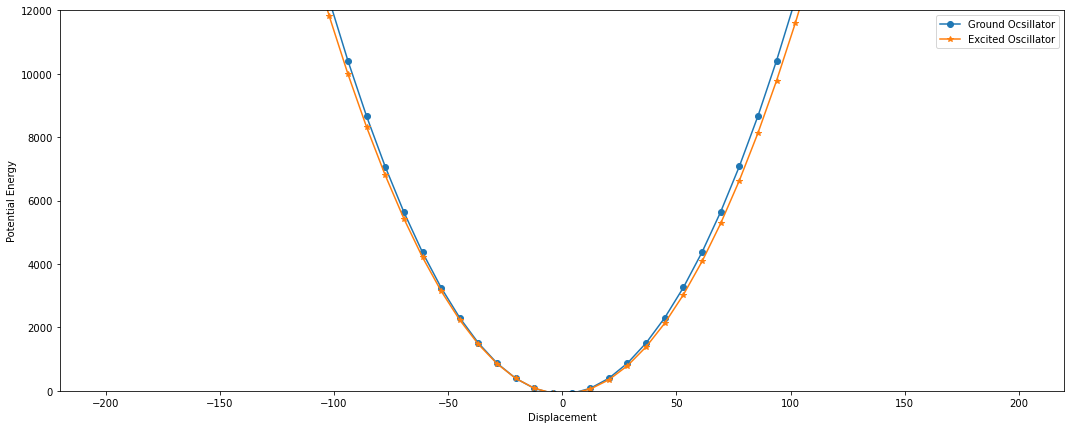

In [71]:
# Harmonic Potential Energy Diagrams for Diatomic Molecules
z = np.linspace(-200,200,50)
y_gs = E_gs_total + (ω_gs**2 * m_reduced)* (z)**2 #(1./2.) * np.sqrt(ω_gs**2 * m_reduced)* z**2
y_ex = E_ex_total + (ω_ex**2 * m_reduced)* (z-d)**2 # (1./2.) * np.sqrt(ω_ex**2 * m_reduced)* z**2
plt.figure(figsize=(18,7))
plt.xlabel('Displacement')
plt.ylabel('Potential Energy')
plt.ylim(top=12000)
#markerline, stemlines, baseline = plt.stem(z, y, '-.')
#plt.setp(baseline, 'color', 'r', 'linewidth', 2)
plt.plot(z,y_gs,'-o')
plt.plot(z,y_ex, '-*')
plt.legend(['Ground Ocsillator', 'Excited Oscillator'])
plt.show()

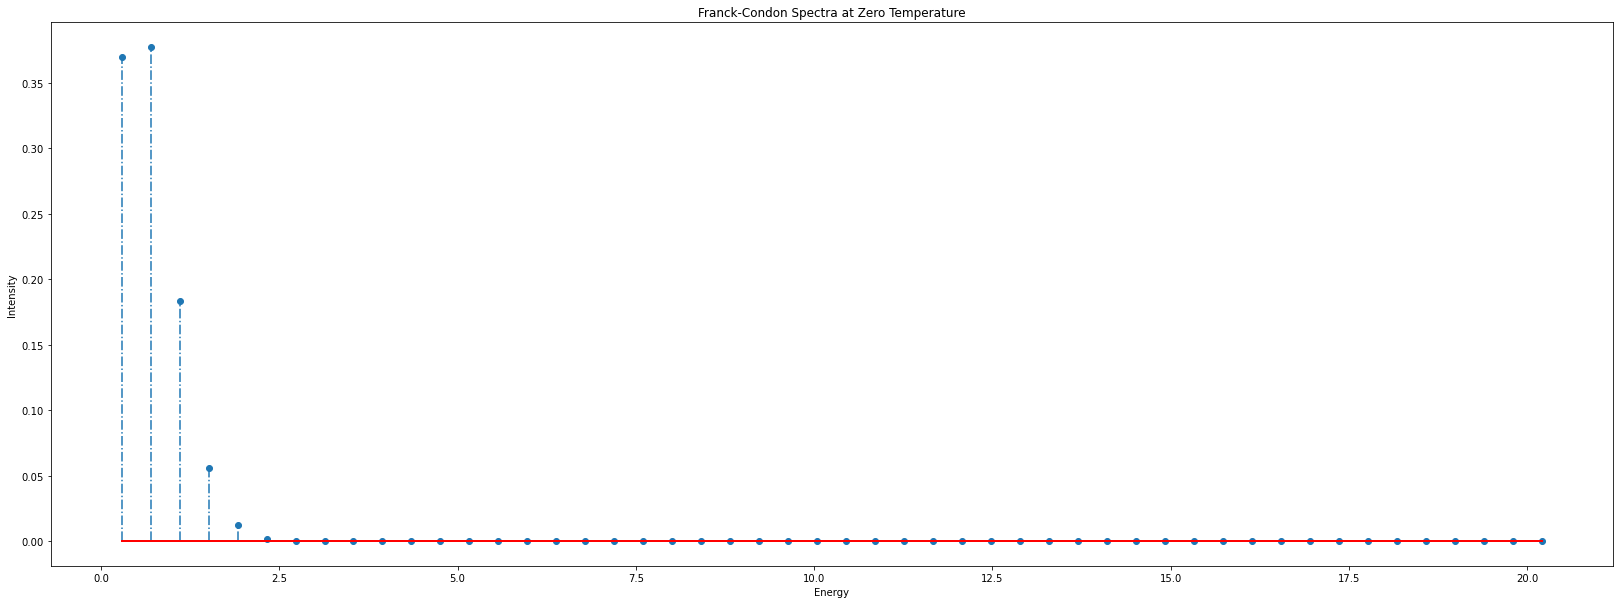

In [72]:
# Setting Up Trace
trace1 = go.Scatter(
    x=x,
    y=ψ_gs[0],
    mode='lines',
    name='Ground Wavefunction',
    marker=dict(
        #color='rgb(220, 20, 60)'
    )
)

trace2 = go.Scatter(
    x=x,
    y=ψ_es[2],
    mode='lines',
    name='Excited Wavefunction',
    marker=dict(
        #color='rgb(100, 149, 237)'
    )
)
#Setting up the Layout for the Graphs

layout = go.Layout(
    template='plotly_white',
    title='Wavefunction Overlap of CO Molecule',
    xaxis=dict(
        title='Range of X',
    ),
    yaxis=dict(
        title='Vibrational Wavefunction',
    )
)
data = [trace1, trace2]
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='jupyter-basic_bar')

# FC Plot
plt.figure(figsize=(28,10))
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.title('Franck-Condon Spectra at Zero Temperature')
markerline, stemlines, baseline = plt.stem(diff_E, overlap, '-.', use_line_collection=True)
plt.setp(baseline, 'color', 'r', 'linewidth', 2)
plt.show()

In [73]:
# Boltzman Distribution
T = 100*298.15
print("Current Temperature(K): ", T)
boltzman = [np.exp(-(i*h_bar*ω_gs)/(T*k_b*joule_2_hatree)) for i in v]
pd.DataFrame(boltzman).T

Current Temperature(K):  29814.999999999996


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,1.0,0.012064,0.000146,0.000002,2.118342e-08,2.555614e-10,3.083147e-12,3.719574e-14,4.487374e-16,5.413664e-18,6.531160e-20,7.879332e-22,9.505795e-24,1.146799e-25,1.383523e-27,1.669112e-29,2.013653e-31,2.429314e-33,2.930776e-35,3.535751e-37,4.265606e-39,5.146118e-41,6.208387e-43,7.489931e-45,9.036013e-47,1.090124e-48,1.315149e-50,1.586624e-52,1.914137e-54,2.309256e-56,2.785936e-58,3.361012e-60,4.054797e-62,4.891794e-64,5.901565e-66,7.119775e-68,8.589449e-70,1.036249e-71,1.250154e-73,1.508212e-75,1.819539e-77,2.195131e-79,2.648253e-81,3.194909e-83,3.854407e-85,4.650039e-87,5.609907e-89,6.767912e-91,8.164953e-93,9.850375e-95


In [74]:
# Testing Boltzman Contribution
diff_E = np.zeros([len(v),len(v)])
for i in range(len(v)):
    for j in range(len(v)):
        diff_E[i][j] = E_ex_total[j] - E_gs_total[i]

overlap = np.zeros([len(v),len(v)])
for i in range(len(v)):
    for j in range(len(v)):
        overlap[i][j] = boltzman[i]*(np.trapz((ψ_gs[i]*ψ_es[j]),x,dx=0.01))**2

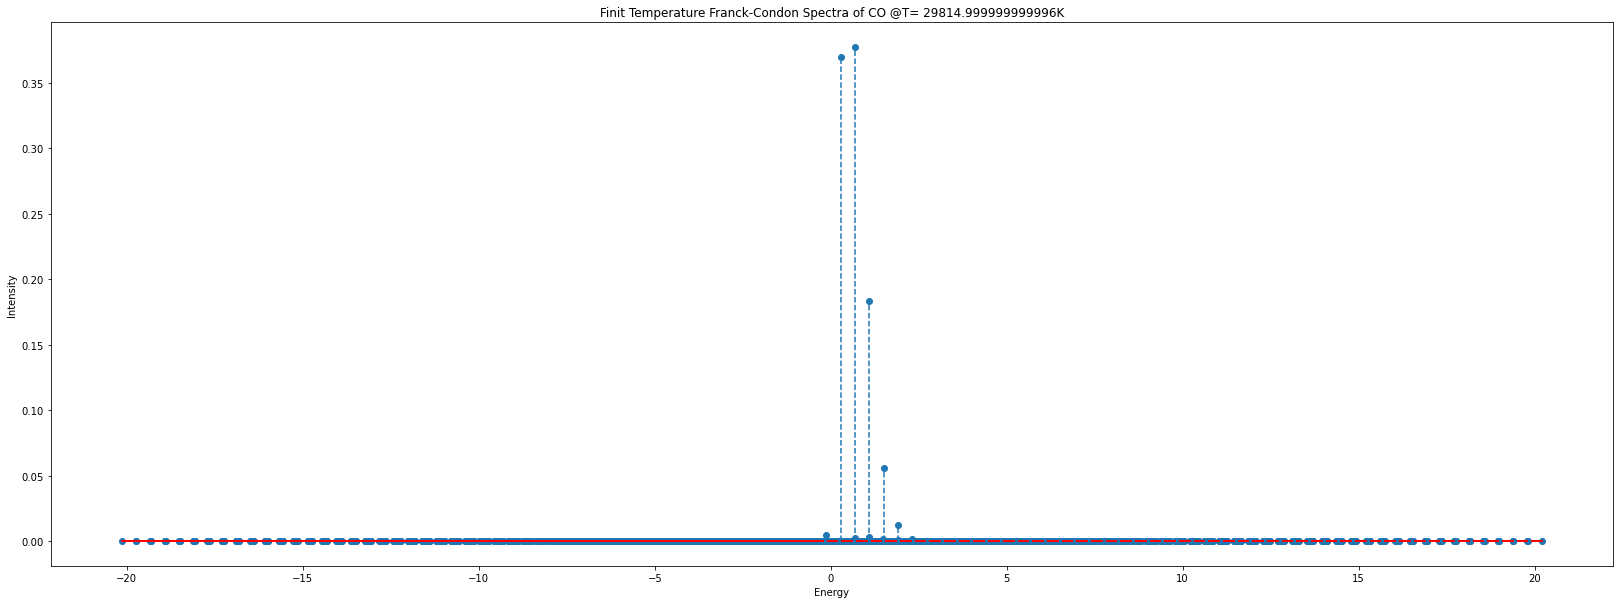

In [75]:
# Plotting BZman Distribution
x = (diff_E[i] for i in v)
y = (overlap[j] for j in v)

#lines = [y1,y2,y3]
#colors  = ['r','g','b']
#labels  = ['RED','GREEN','BLUE']

# fig1 = plt.figure()
plt.figure(figsize=(28,10))
#plt.title('Franck Condon at Finite Temperature @: T')
plt.title('Finit Temperature Franck-Condon Spectra of CO @T= {}K'.format(T))
for x,y in zip(x,y):  
    #plt.plot(x,y)
    #plt.legend(labels)
    plt.xlabel('Energy')
    plt.ylabel('Intensity')
    markerline, stemlines, baseline = plt.stem(x, y, '--o', use_line_collection=True)
    plt.setp(baseline, 'color', 'r', 'linewidth', 2)
plt.show()